In [30]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [31]:
import numpy as np

def apply_mask(image, mask, save_path=None):
    mask = (mask >= 1).astype(np.uint8)

    if image.ndim == 3 and mask.ndim == 2:
        mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        
    masked_image = image * mask
    if save_path:
        cv2.imwrite(save_path, masked_image)
    return masked_image

def show_image_mask_masked(images, masks, titles=None):
    # assert len(images) == len(masks) == 4, "Cần đúng 4 ảnh và 4 mask"

    fig, axes = plt.subplots(len(images), 3, figsize=(12, 16))

    for i in range(len(images)):
        save_path = f"../out/{i+1}_applied_mask.png"
        masked_img = apply_mask(images[i], masks[i], save_path)
        # Image
        axes[i, 0].imshow(images[i])
        axes[i, 0].axis("off")
        axes[i, 0].set_title(f"{titles[i]} - Image" if titles else f"Image {i+1}")

        # Mask
        axes[i, 1].imshow(masks[i], cmap="gray")
        axes[i, 1].axis("off")
        axes[i, 1].set_title("Mask")

        # Masked Image
        axes[i, 2].imshow(masked_img)
        axes[i, 2].axis("off")
        axes[i, 2].set_title("Masked")

    plt.tight_layout()
    plt.show()


ValueError: operands could not be broadcast together with shapes (287,480,3) (483,883,3) 

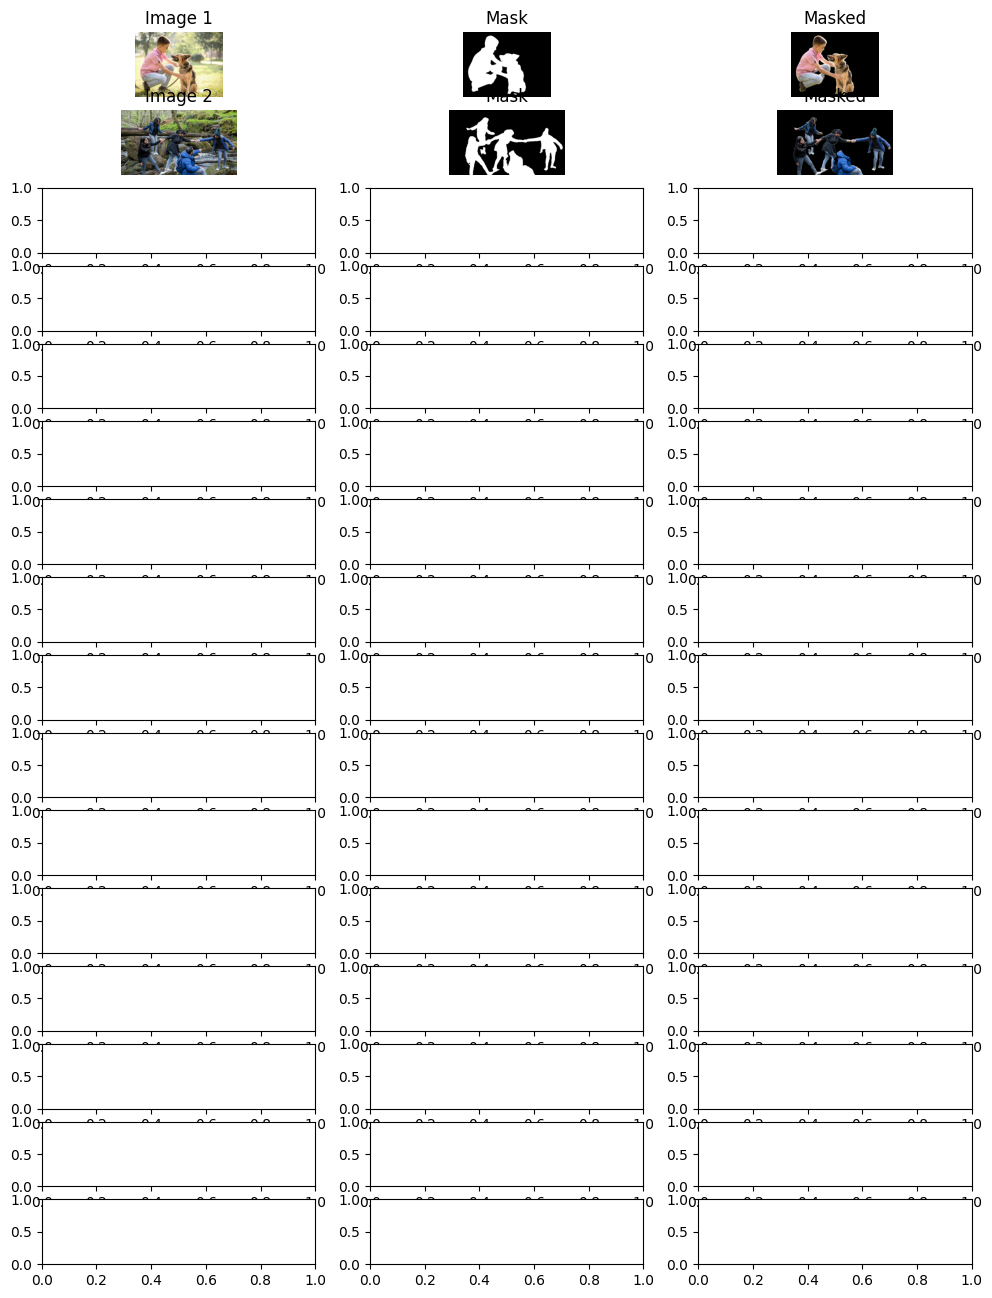

In [32]:
output_dir = "../out"
input_dir = "../images"
image_paths = sorted([os.path.join(input_dir, file) for file in os.listdir(input_dir)])
mask_paths = sorted([os.path.join(output_dir, file) for file in os.listdir(output_dir)])

images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
masks = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in mask_paths]

show_image_mask_masked(images, masks)

In [ ]:
path = "../checkpoints/checkpoints_no_obj/checkpoints/training_log.csv"

df = pd.read_csv(path)
df

,epoch,train_loss,val_loss,dice,iou
0,1,0.070797,0.033012,0.967395,0.941023
1,2,0.026406,0.028411,0.966383,0.940628
2,3,0.021297,0.027941,0.970093,0.945753
3,4,0.017905,0.023809,0.974097,0.952363
4,5,0.017181,0.022337,0.975987,0.955464
...,...,...,...,...,...
181,182,0.006688,0.024821,0.983101,0.968178
182,183,0.006690,0.024579,0.983135,0.968217
183,184,0.006689,0.024887,0.983058,0.968121
184,185,0.006689,0.025007,0.983064,0.968110


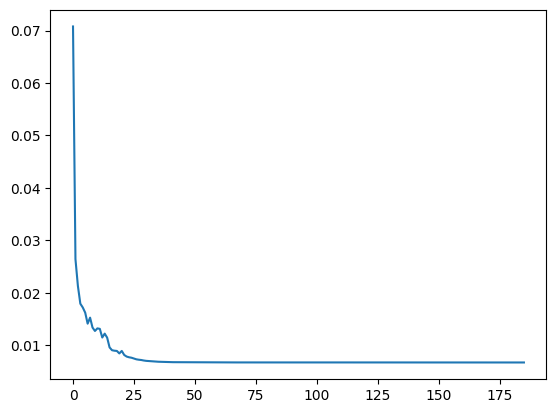

In [ ]:
# df['train_loss'].to_list()
plt.plot(df['train_loss'].to_list())

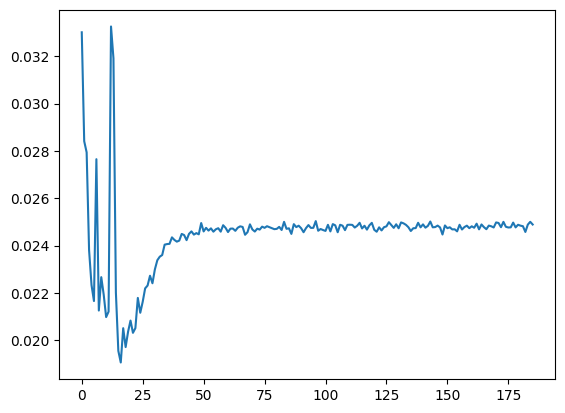

In [ ]:
plt.plot(df['val_loss'].to_list())

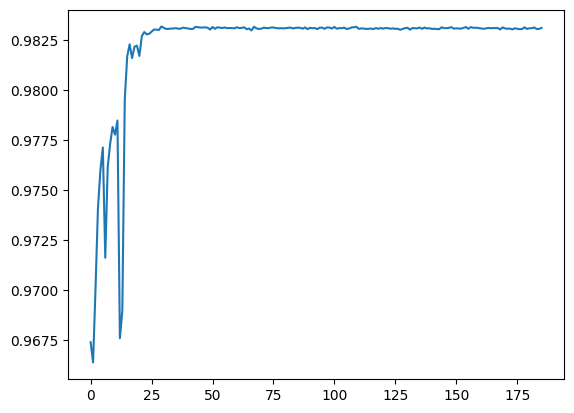

In [ ]:
plt.plot(df['dice'])

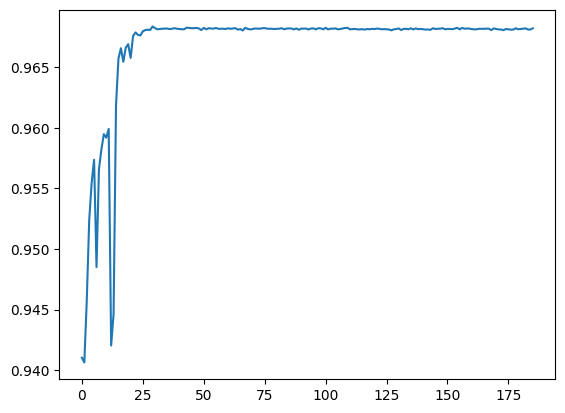

In [ ]:
plt.plot(df['iou'])